<a href="https://colab.research.google.com/github/kk-shetty/data_science_ik/blob/main/assingments/maths_for_ml/Probability_distribution_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 1. You have an unfair coin with p(H) = p. You toss the coin n times and note the number of heads obtained. What is the probability that the number of heads would be an even number?


#### Can you code the above problem using dynamic programming?

In [1]:
# We can use binomial distribution to find the number of heads in n trial
# p(k; n, p) = nCk * p**k * (1-p)**(n-k)

In [7]:
from scipy import stats

In [6]:
def binomial(n,p,k):
    # Return the binomial pmf for k
    return stats.binom.pmf(k,n,p)

def probability_of_even_heads(n,p):
    # Initialize probability to 0
    probability = 0

    # Compute the probability of each possible even numbers for k from 0 to n
    for k in range(0, n+1, 2):
        probability += binomial(n,p,k)

    return probability

In [14]:
# Define n and p
n = 101
p = 0.3

print(f'Probability of getting even number of heads by tossing an unfair coin where p(H) = {p} for {n} times is : {probability_of_even_heads(n,p)}')

Probability of getting even number of heads by tossing an unfair coin where p(H) = 0.3 for 101 times is : 0.4999999999999998


#### 2.  A game of dice is begun by rolling an ordinary pair of dice. If the sum of the dice is 2, 3, or 12, the player loses. If it is 7 or 11, the player wins. If it is any other number i, the player continues to roll the dice until the sum is either 7 or i. If it is 7, the player loses; if it is i, the player wins. Let R denote the number of rolls of the dice in a game of craps. Find:
1. E[R]
2. E[R|player wins]
3. E[R|player loses]

#### 3. Generate 2 normal random variables, X\~N(1,9) & Y\~N(9,16) in Python. Then add X and Y to get Z. What is the distribution of Z? What does Z look like after plotting? Does the plot support theory?

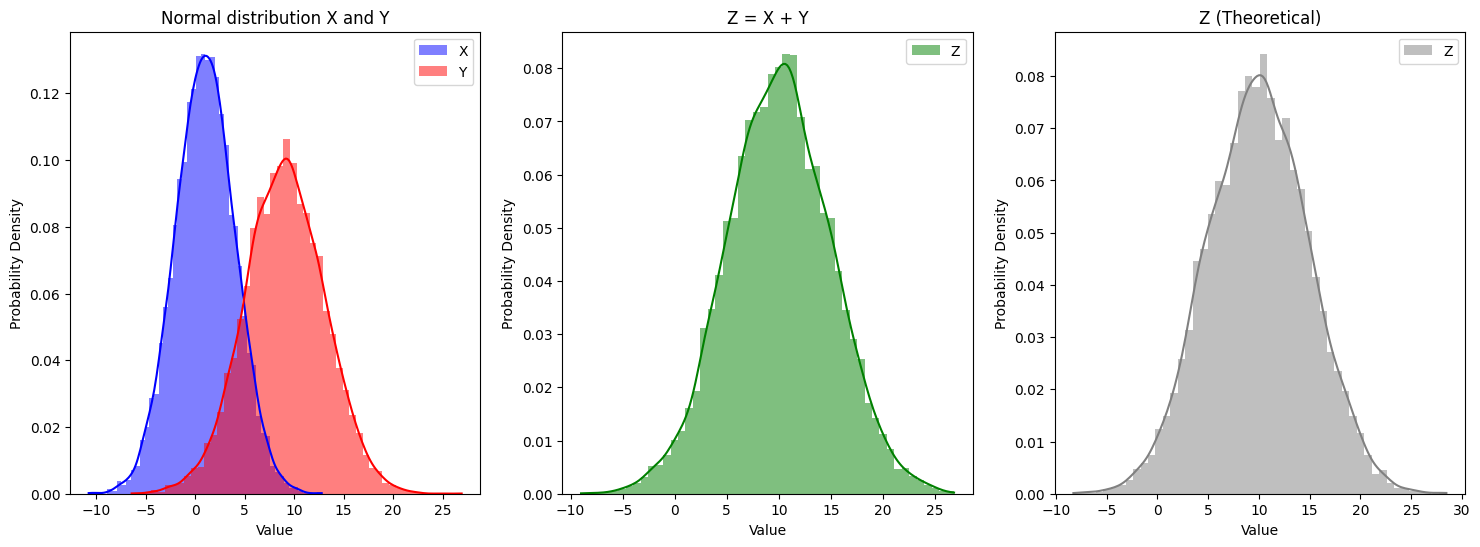

In [51]:
from matplotlib.colors import scale
## Theory:
## When you add two independent normal distributions, the resulting distribution is also normal.
## The mean of the new distribution is the sum of the two means, and the variance is the sum of the two variances.

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

np.random.seed(42)

mean_X, std_X = 1, 3
mean_Y, std_Y = 9, 4

X = np.random.normal(mean_X, std_X, 10000)
Y = np.random.normal(mean_Y, std_Y, 10000)

plt.figure(figsize=(18, 6))

# 1st plot, X and Y
plt.subplot(1,3,1)
sns.histplot(X, bins=50, kde=True, color='blue', stat='density', linewidth=0, label='X')
sns.histplot(Y, bins=50, kde=True, color='red', stat='density', linewidth=0, label='Y')
plt.title('Normal distribution X and Y')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# 2nd plot, Z
Z = X + Y
plt.subplot(1,3,2)
sns.histplot(Z, bins=50, kde=True, color='green', stat='density', linewidth=0, label='Z')
plt.title('Z = X + Y')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

# 3rd Plot, theoretical Z
mean_Z, std_Z = mean_X + mean_Y, (std_X**2 + std_Y**2)**0.5
Z_theoretical = np.random.normal(mean_Z, std_Z, 10000)

plt.subplot(1,3,3)
sns.histplot(Z_theoretical, bins=50, kde=True, color='grey', stat='density', linewidth=0, label='Z')
plt.title('Z (Theoretical)')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()

plt.show()

#### 4. Mark was the first to arrive at a 100-seat theatre. He forgot his seat number and picked a random seat for himself. After this, every single person who gets to the theatre sits on his/her seat if it is available, and chooses any available seat at random. John was last to enter the theatre and 99 seats were occupied. What's the probability that John gets to sit in his own seat? Can we write a simulation to verify the result?

In [52]:
import random

In [155]:
def chose_random_seat(seats):
    available_seats = [index for index, occupancy in enumerate(seats) if occupancy == 0]
    return random.choice(available_seats)

def john_gets_right_seat(n_seats):
    seats = [0] * n_seats

    mark = chose_random_seat(seats)
    seats[mark] = 1

    for i in range(1,99):
        if seats[i] == 0:
            seats[i] = 1
        else:
            random_selection = chose_random_seat(seats)
            seats[random_selection] = 1

    return not seats[99]

In [164]:
def simulation(n):
    result = []
    for i in range(n):
        result.append(john_gets_right_seat(100))
    return (sum(result)/n)

In [166]:
print(f'Probability of John, the last person getting his correct seat in {100} simulation is: {simulation(100)}')
print(f'Probability of John, the last person getting his correct seat in {10,000} simulation is: {simulation(10000)}')
print(f'Probability of John, the last person getting his correct seat in {1,000,000} simulation is: {simulation(1000000)}')

Probability of John, the last person getting his correct seat in 100 simulation is: 0.53
Probability of John, the last person getting his correct seat in (10, 0) simulation is: 0.4922
Probability of John, the last person getting his correct seat in (1, 0, 0) simulation is: 0.500339
